# Progetto finale
Immagina di lavorare per una compagnia aerea attenta alla qualità del servizio e a ridurre il più possibile l’impatto ambientale degli spostamenti.  
La compagnia vuole analizzare i dati relativi al livello di soddisfazione dei passeggeri per ottimizzare i propri servizi in volo e a terra.

In [1]:
# Importo le librerie necessarie alla prima parte di analisi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)      # Nessun limite sul numero di colonne stampate
pd.set_option('display.max_colwidth', None)     # Nessun limite sulla larghezza di ogni colonna

In [2]:
df_train= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print(df_train.shape,df_test.shape)

(103904, 25) (25976, 25)


In [4]:
# Metto insieme i dataset di train e test per ottenerne uno completo
df=pd.concat([df_train,df_test])

In [5]:
dataframes=[df,df_train,df_test]

# Analisi esplorativa del dataset (EDA)

In [6]:
# Info generali del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [7]:
# Il dataset è formato da variabili categoriche (di tipo object), numeriche (di tipo int e float)

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
# Analizzo subito le colonne 'Unnamed: 0' e 'id'

In [10]:
# Controllo se ci sono clienti che hanno lasciato più di una recensione
print(df['id'].nunique())


129880


In [11]:
print(df['Unnamed: 0'].nunique())

103904


In [12]:
# Tutti gli id sono unici,
# ciò non ci permette di visualizzare statistiche sui singoli clienti e 
# fa perdere di importanza la feature 'id' che pertato può essere droppata

# Con essa, anche la colonna 'Unnamed: 0' (che altro non è che una ripetizione degli indici del dataset)
for df in dataframes:
    df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [13]:
# Suddivido le variabili in categorie in base al loro tipo:

rating_features = []
numerical_features = []
categorical_features = []

for col in df.columns:
    unique_vals = df[col].unique()

    # Rating: solo valori interi da 0 a 5
    if set(unique_vals).issubset({0, 1, 2, 3, 4, 5}):
        rating_features.append(col)
    
    # Numeriche non rating
    elif np.issubdtype(df[col].dtype, np.number):
        numerical_features.append(col)
    
    # Categorical (escludo satisfaction che è la variabile target)
    else:
        if col not in ['satisfaction']:
            categorical_features.append(col)

# Escludi le rating dalle numeriche
numerical_features = [col for col in numerical_features if col not in rating_features]

print('Rating Features:\n',rating_features)
print('\nNumerical Features:\n',numerical_features)
print('\nCategorical Features:\n',categorical_features)

Rating Features:
 ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

Numerical Features:
 ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Categorical Features:
 ['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [14]:
for col in categorical_features:
    print(f'Numero valori distinti di {col}: {df[col].nunique()}')
print(f'Numero valori distinti di "satisfaction": {df['satisfaction'].nunique()}')

Numero valori distinti di Gender: 2
Numero valori distinti di Customer Type: 2
Numero valori distinti di Type of Travel: 2
Numero valori distinti di Class: 3
Numero valori distinti di "satisfaction": 2


In [15]:
# Vediamo che solo la feature 'Class' presenta più di due valori distinti. 
# Per questa caratteristica faremo una one-hot encoding per rendere i dati leggibili dagli algoritmi di ML.

# Per le altre features possiamo avvalerci di una trasformazione binaria, ad esempio con label-encoding

In [16]:
for feat in categorical_features:
    print('\n',df[feat].value_counts(normalize=True))
    
print('\n',df['satisfaction'].value_counts(normalize=True))


 Gender
Female    0.507083
Male      0.492917
Name: proportion, dtype: float64

 Customer Type
Loyal Customer       0.815253
disloyal Customer    0.184747
Name: proportion, dtype: float64

 Type of Travel
Business travel    0.69441
Personal Travel    0.30559
Name: proportion, dtype: float64

 Class
Business    0.481021
Eco         0.445180
Eco Plus    0.073799
Name: proportion, dtype: float64

 satisfaction
neutral or dissatisfied    0.561018
satisfied                  0.438982
Name: proportion, dtype: float64


In [17]:
# Si nota:
# Una percentuale alta di clienti 'loyal' (probabilmente iscritti al programma fedeltà) rispetto a chi non lo è, 

# Per quanto riguarda il tipo di viaggio abbiamo una percentuale maggiore di viaggiatori per affari

# Riguardo la classe di viaggio, c'è un certo bilancio tra business e economy, 
#   con una minima percentuale di economy plus,
 
# Per quanto riguarda la soddisfazione, che è anche la nostra variabile target, 
#   c'è un leggero sbilanciamento verso la classe 'neutral or dissatisfied'
#   che potrebbe anche essere dovuta al fatto che in realtà questa classe è un insieme di due sottoclassi(neutral e dissatisfied).

In [18]:
# Vado ora a fare dei grafici per vedere come è distribuita la soddisfazione in base alle features
#  che non fanno parte delle votazioni degli utenti

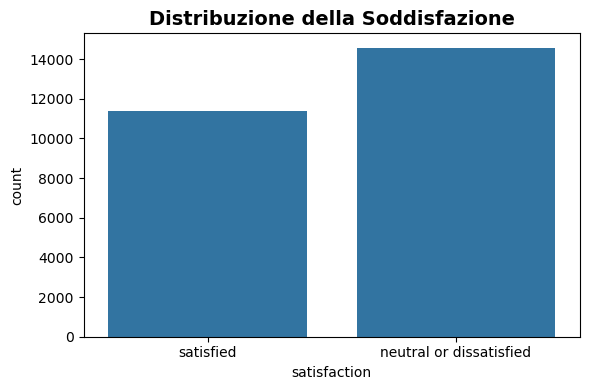

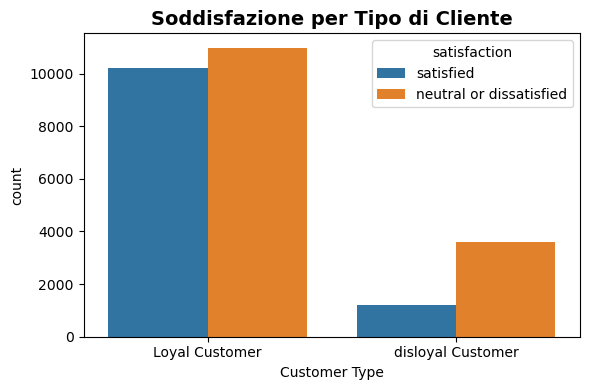

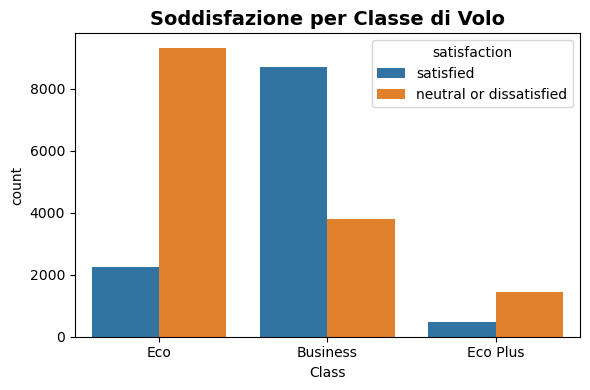

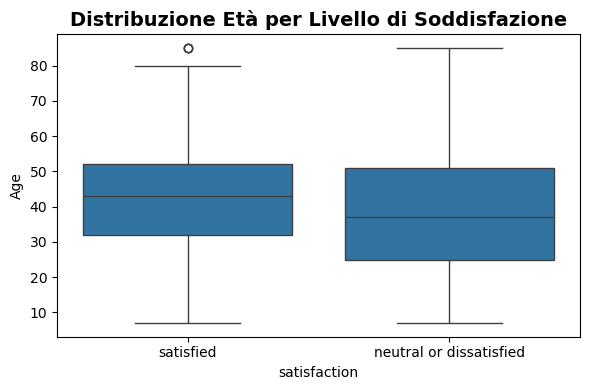

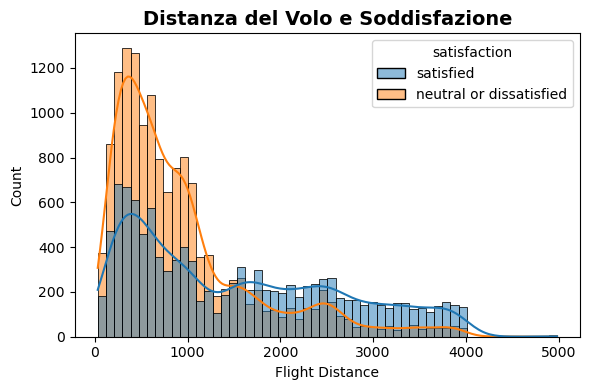

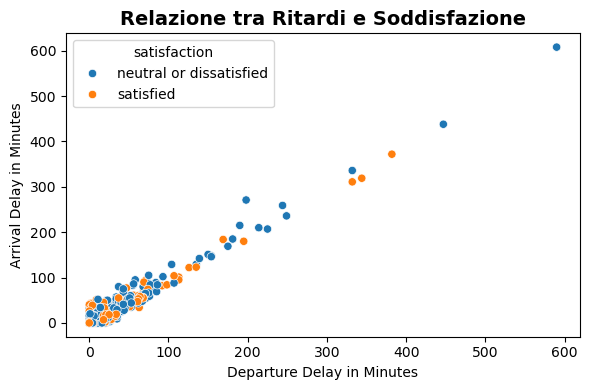

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista di tuple (funzione grafico, titolo)
graphics = [
    (lambda: sns.countplot(x='satisfaction', data=df), 'Distribuzione della Soddisfazione'),    # Visualizzare la distribuzione della variabile target.
    (lambda: sns.countplot(x='Customer Type', hue='satisfaction', data=df), 'Soddisfazione per Tipo di Cliente'),   # Vedere se c'è una relazione tra il tipo di cliente e la soddisfazione.
    (lambda: sns.countplot(x='Class', hue='satisfaction', data=df), 'Soddisfazione per Classe di Volo'),    #   Vedere la relazione tra la classe del volo e la soddisfazione.
    (lambda: sns.boxplot(x='satisfaction', y='Age', data=df), 'Distribuzione Età per Livello di Soddisfazione'),    # Visualizzare la distribuzione dell'età per i diversi livelli di soddisfazione.
    (lambda: sns.histplot(x='Flight Distance', hue='satisfaction', kde=True, data=df), 'Distanza del Volo e Soddisfazione'),    # Esaminare la distribuzione della distanza del volo per i clienti soddisfatti e insoddisfatti.
    (lambda: sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', data=df.sample(1000)), 'Relazione tra Ritardi e Soddisfazione') # Visualizzare la relazione tra i ritardi e la soddisfazione (solo un campione del dataset)
]

for plot_func, title in graphics:
    plt.figure(figsize=(6, 4))
    plot_func()
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [20]:
# Dai grafici si possono ottenere alcune informazioni interessanti, tra le quali:

# La maggior parte degli insoddisfatti viaggia in economy class, 
#   mentre la maggior parte dei soddisfatti viaggia in Business

# All'aumentare della distanza di viaggio si ha una riduzione degli insoddisfatti a favore dei soddisfatti

# Non si vedono particolari pattern che legano la soddisfazione al ritardo dei voli


In [21]:
# Ora analizzo gli outliers nelle variabili numeriche

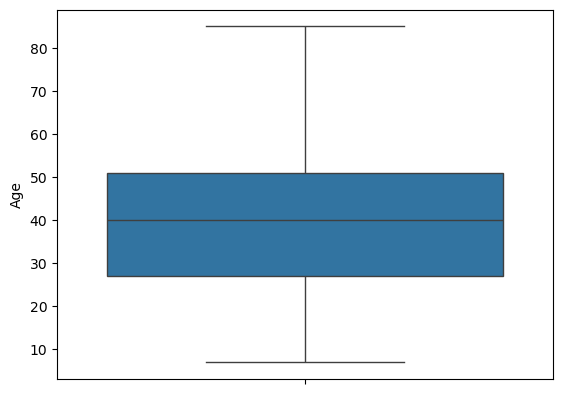

Outlier rilevati: 0 (0.00%)


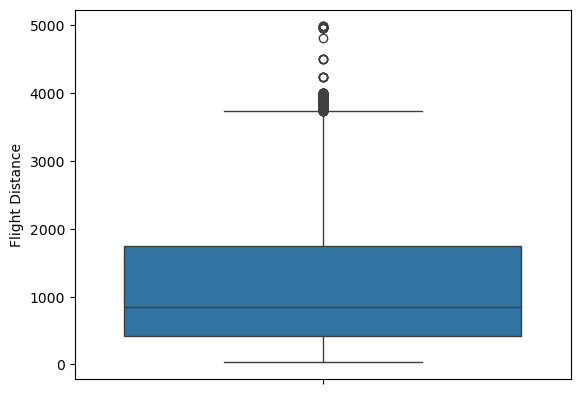

Outlier rilevati: 584 (2.25%)


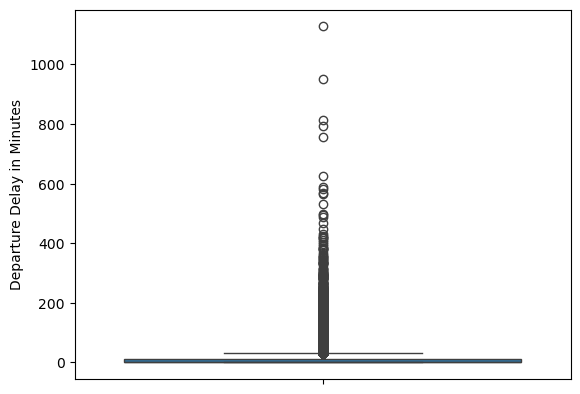

Outlier rilevati: 3569 (13.74%)


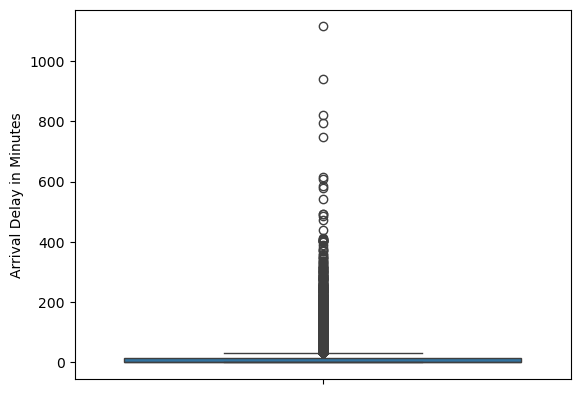

Outlier rilevati: 3538 (13.62%)


In [22]:
for col in numerical_features:
    sns.boxplot(df[col])
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

    # Percentuale
    percentuale_outliers = (len(outliers) / len(df)) * 100
    print(f"Outlier rilevati: {len(outliers)} ({percentuale_outliers:.2f}%)")

In [24]:
# Dai boxplot si vede come nei ritardi sono presenti molti outliers (più del 13%), 
# solo qualcuno in quello della distanza di volo (2.20%) 

# Questo ci suggerisce che i dati riguardo i ritardi sono molto variabili e non c'è un vero e proprio 
# 'range maggioritario' 

In [25]:
# Inizio una analisi specifica al dataframe di addestramento
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [26]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [27]:
print('----- DF FULL -----')
for feat in categorical_features:
    print('\n',df[feat].value_counts(normalize=True))
print('\n',df['satisfaction'].value_counts(normalize=True))

print('----- DF TRAIN -----')
for feat in categorical_features:
    print('\n',df_train[feat].value_counts(normalize=True))
print('\n',df_train['satisfaction'].value_counts(normalize=True))

----- DF FULL -----

 Gender
Female    0.507083
Male      0.492917
Name: proportion, dtype: float64

 Customer Type
Loyal Customer       0.815253
disloyal Customer    0.184747
Name: proportion, dtype: float64

 Type of Travel
Business travel    0.69441
Personal Travel    0.30559
Name: proportion, dtype: float64

 Class
Business    0.481021
Eco         0.445180
Eco Plus    0.073799
Name: proportion, dtype: float64

 satisfaction
neutral or dissatisfied    0.561018
satisfied                  0.438982
Name: proportion, dtype: float64
----- DF TRAIN -----

 Gender
Female    0.507459
Male      0.492541
Name: proportion, dtype: float64

 Customer Type
Loyal Customer       0.817322
disloyal Customer    0.182678
Name: proportion, dtype: float64

 Type of Travel
Business travel    0.689627
Personal Travel    0.310373
Name: proportion, dtype: float64

 Class
Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: proportion, dtype: float64

 satisfaction
neutral or dissatisfied    0

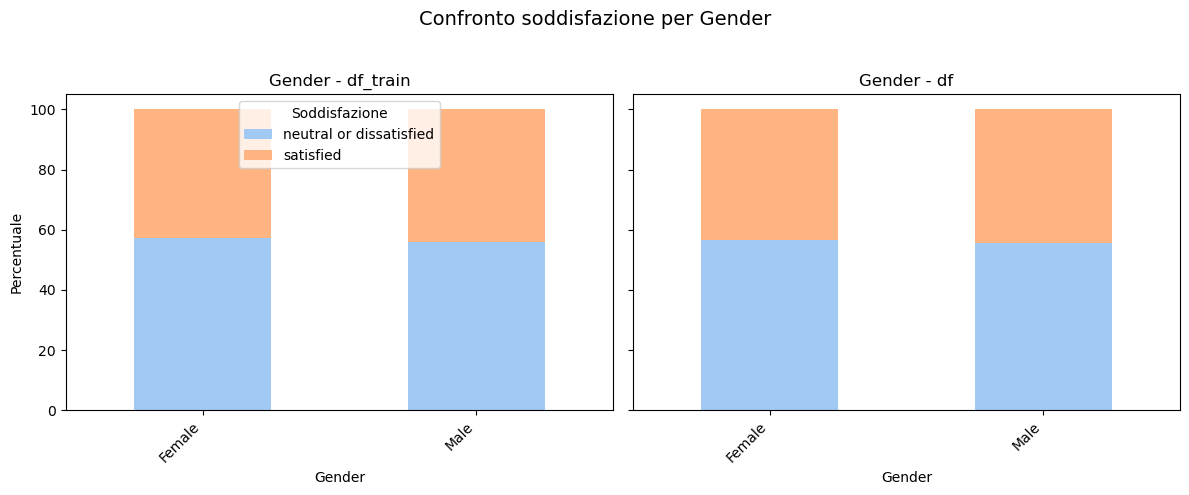

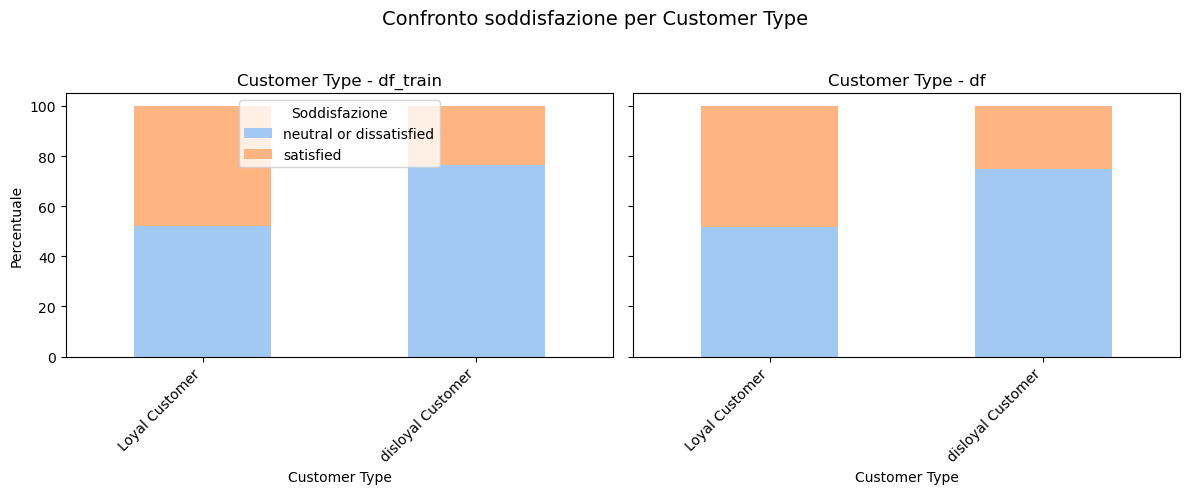

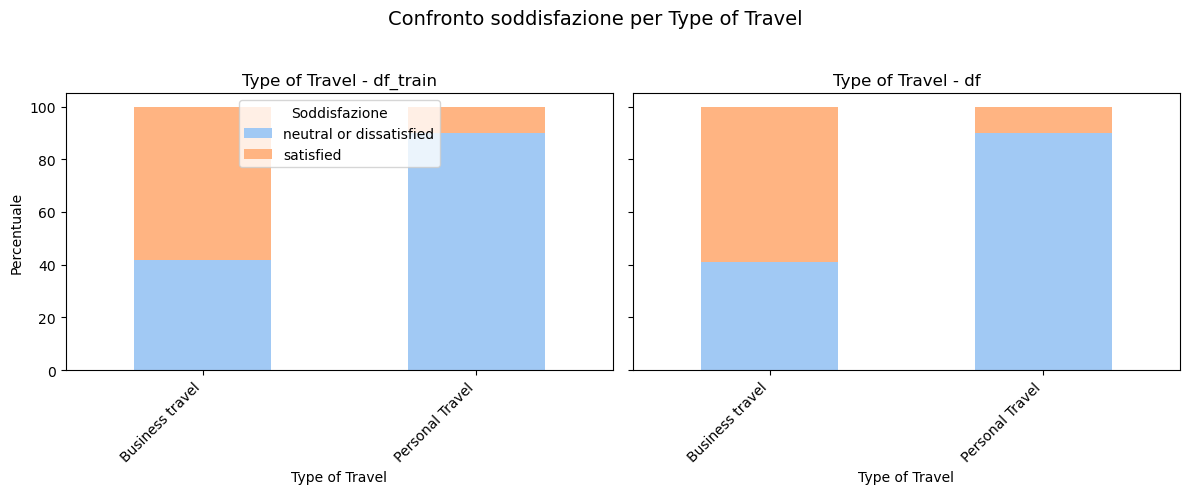

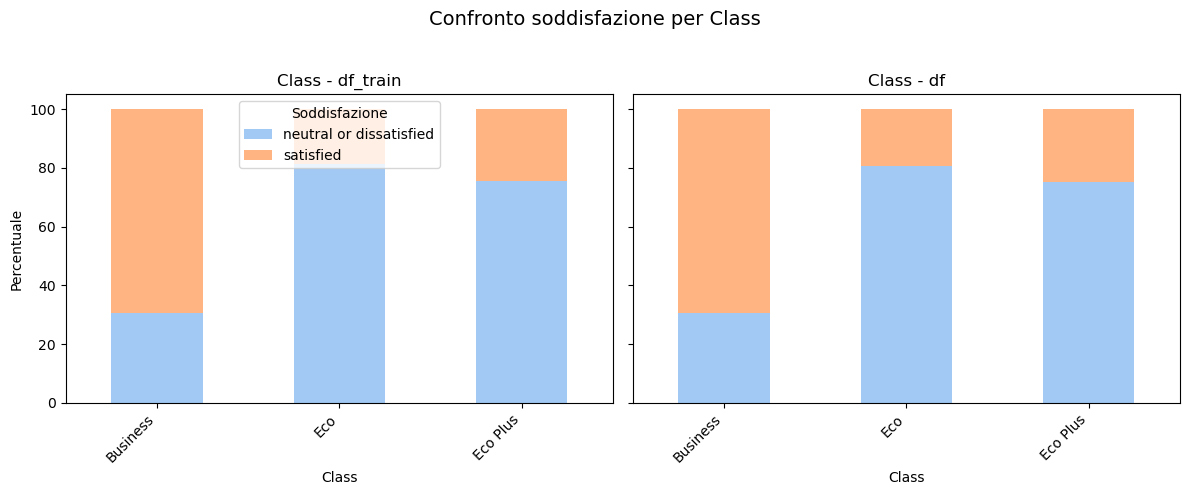

In [28]:
for col in categorical_features:
    # Crea le crosstab normalizzate
    cross_train = pd.crosstab(df_train[col], df_train['satisfaction'], normalize='index') * 100
    cross_df = pd.crosstab(df[col], df['satisfaction'], normalize='index') * 100

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Plot per df_train
    cross_train.plot(kind='bar', stacked=True, ax=axes[0], color=sns.color_palette("pastel"))
    axes[0].set_title(f'{col} - df_train')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Percentuale')
    axes[0].legend(title='Soddisfazione', loc='upper center')

    # Plot per df
    cross_df.plot(kind='bar', stacked=True, ax=axes[1], color=sns.color_palette("pastel"))
    axes[1].set_title(f'{col} - df')
    axes[1].set_xlabel(col)
    axes[1].legend_.remove()  # Evita doppia legenda

    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.suptitle(f'Confronto soddisfazione per {col}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [29]:
# Analizzando la distribuzione delle variabili, sia attraverso analisi descrittive che mediante visualizzazioni grafiche,
# si osserva che le proporzioni delle classi e delle variabili categoriali nel training set sono coerenti
# con quelle presenti nel dataset complessivo.

# Questo suggerisce che il dataset di training rappresenta in modo fedele l’intera popolazione dei dati,
# condizione fondamentale per l’addestramento di modelli generalizzabili.

# Di conseguenza, ci si può aspettare che i modelli performino in modo coerente anche sul test set, 
# senza incorrere in problemi di bias dovuti a uno sbilanciamento o a una cattiva suddivisione iniziale.

In [30]:
# L'analisi dei grafici che mostrano la percentuale di soddisfazione in base a variabili come
#  Genere, Tipo di cliente, Tipologia di viaggio e Classe suggerisce alcune tendenze interessanti:

# I clienti meno soddisfatti tendono ad essere coloro che viaggiano in classe Economy,
# Non sono clienti fidelizzati,
# Viaggiano per motivi personali piuttosto che lavorativi.

# Per approfondire se esiste una correlazione tra queste caratteristiche e la soddisfazione,
# è necessario trasformare le variabili categoriche in formato numerico,
# così da poter costruire una matrice di correlazione o visualizzarla tramite heatmap.

# In particolare:

# Per la variabile Classe, che ha tre valori non ordinali (Economy, Eco Plus, Business),
# verrà utilizzata una codifica one-hot,

# Mentre per le altre variabili categoriali a due classi si applicherà una label encoding.

# Features engineering

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [32]:
df_train_encoded=df_train.copy()
df_test_encoded=df_test.copy()

In [33]:
to_dummify_train = []   # lista per salvare i nomi delle variabili categoriche da codificare con one-hot encoding
label_maps = {}     # dizionario per salvare i mapping delle label per le variabili binarie
le = LabelEncoder()

# ENCODING TRAIN
for col in df_train_encoded.columns:
    if df_train_encoded[col].dtype == 'object': # Se la variabile è categorica
        if df_train_encoded[col].nunique() > 2:     # e ha più di 2 valori distinti
            to_dummify_train.append(col)    # la aggiunge alla lista da destinare alla one-hot 
        else:       # Se ha solo due valori
            df_train_encoded[col] = le.fit_transform(df_train_encoded[col])      # la codifica direttamente con LabelEncoder e 
            label_maps[col] = dict(zip(le.classes_, le.transform(le.classes_))) # salva il mapping in label_maps per poterla poi applicare anche al test.

df_train_encoded = pd.get_dummies(df_train_encoded, columns=to_dummify_train, dtype=int)    # Codifica one-hot per le variabili aggiunte alla lista

# ENCODING TEST (usando mapping del TRAIN)
to_dummify_test = []

for col in df_test_encoded.columns:
    if df_test_encoded[col].dtype == 'object':
        if df_test_encoded[col].nunique() > 2:
            to_dummify_test.append(col)
        else:
            # Usa il mapping dal train
            df_test_encoded[col] = df_test_encoded[col].map(label_maps[col])

df_test_encoded = pd.get_dummies(df_test_encoded, columns=to_dummify_test, dtype=int)

# Reallinea le colonne del test per avere esattamente lo stesso ordine e le stesse colonne del training.
# Se manca una colonna la aggiunge e riempie con 0.
df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)


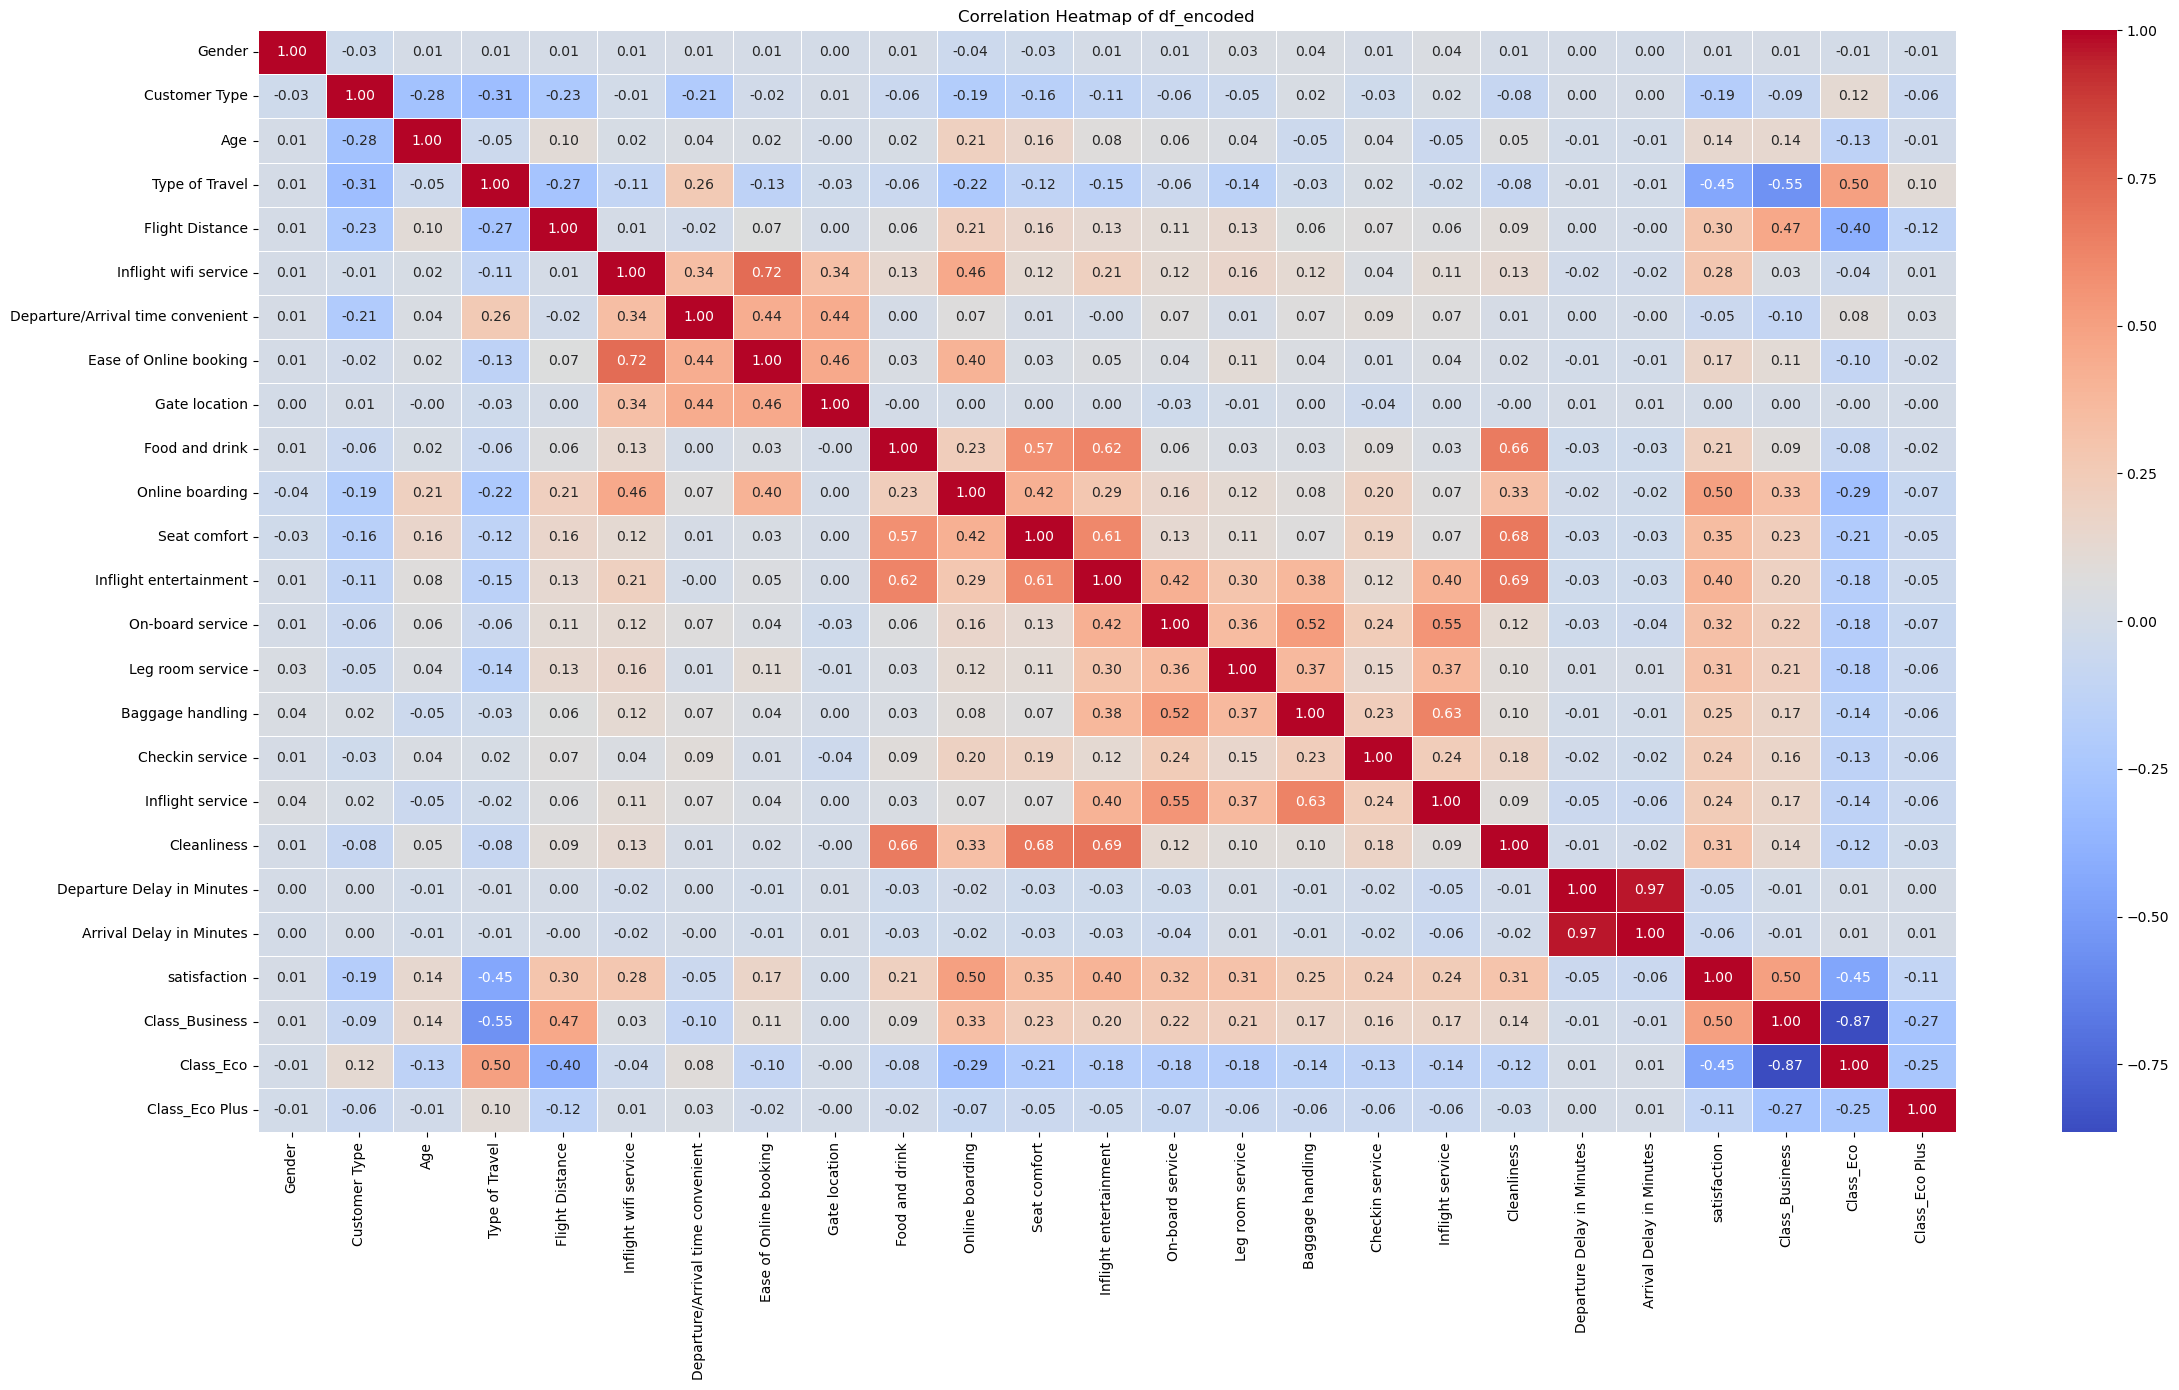

In [34]:
correlation_matrix = df_train_encoded.corr()

# Create the heatmap
plt.figure(figsize=(24, 14))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of df_encoded')
plt.tight_layout()
plt.show()

In [35]:
correlations = df_train_encoded.corr()['satisfaction'].drop('satisfaction')
correlations = correlations.sort_values(ascending=False)

correlations

Class_Business                       0.503848
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
Gender                               0.012211
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057582
Class_Eco Plus                      -0.105363
Customer Type                     

In [36]:
correlations_df= pd.DataFrame({'Feature': correlations.index, 'CM score':correlations.values})

In [38]:
# Dall’analisi della heatmap delle correlazioni, emerge che:
# le variabili "Arrival Delay in Minutes" e "Departure Delay in Minutes" risultano fortemente correlate tra loro.
# Per evitare problemi di multicollinearità, si decide di rimuovere una delle due variabili dal modello.
# Siccome "Arrival Delay in Minutes" presentava anche molti valori nulli, procedo con il suo drop.

# Successivamente, analizzando la correlazione tra ciascuna variabile e il target (satisfaction),
# otteniamo un’indicazione preliminare dell’impatto lineare delle feature sulla soddisfazione dei clienti.
# Questa analisi ci permette di identificare le variabili potenzialmente più rilevanti e quelle meno significative.

# Variabili con bassa correlazione assoluta (< 0.2):
# Queste variabili mostrano una relazione molto debole con il target e, in un’ottica puramente lineare,
# sembrerebbero meno determinanti:
# - Ease of Online Booking
# - Age
# - Gender
# - Gate Location
# - Departure Delay in Minutes
# - Departure/Arrival Time Convenient
# - Arrival Delay in Minutes
# - Class_Eco Plus
# - Customer Type

# Variabili direttamente correlate con la soddisfazione:
#   Una maggiore presenza o un valore più elevato di queste feature tende ad associarsi a una maggiore soddisfazione:
# - Class_Business
# - Online Boarding
# - Inflight Entertainment

# Variabili inversamente correlate con la soddisfazione:
#   Una maggiore presenza di queste caratteristiche tende ad associarsi a una soddisfazione minore:
# - Class_Eco
# - Type of Travel



In [39]:
dataframes.extend([df_train_encoded, df_test_encoded])  # Aggiungo i nuovi df alla lista dei dataframes

In [40]:
for df in dataframes:
    df.drop(columns='Arrival Delay in Minutes', axis=1, inplace=True)

In [41]:
def top_features_list(top_list, df):
    for feat in df['Feature'].head(10):
        top_list.append(feat)
    return top_list

In [42]:
top_corr=[]
top_features_list(top_corr,correlations_df)

['Class_Business',
 'Online boarding',
 'Inflight entertainment',
 'Seat comfort',
 'On-board service',
 'Leg room service',
 'Cleanliness',
 'Flight Distance',
 'Inflight wifi service',
 'Baggage handling']

In [43]:
# Al fine di ridurre e selezionare solo le features più importanti per il nostro problema
# Andiamo a fare una valutazione con altri test

# In particolare,
# Il test del chi-square:
# Misura la dipendenza tra due variabili categoriche.
# Viene usato per valutare quanto una feature categorica è rilevante per predire una variabile target anch'essa categorica

# T-test:
# Confronta le medie di due gruppi per capire se sono statisticamente diverse.
# Lo utilizziamo per capire se una variabile numerica differenzia significativamente tra due classi del target.

# Mutual Information:
# Misura la quantità di informazione che una variabile X fornisce sulla variabile target Y.
# Funziona con variabili sia numeriche che categoriche, ed è non lineare (quindi tendenzialmente più potente).

In [44]:
from scipy.stats import chi2_contingency

alpha = 0.05
chi2_results = []

for col in categorical_features:
    table = pd.crosstab(df_train[col], df_train['satisfaction'])
    chi2, p, dof, _ = chi2_contingency(table)

    chi2_results.append({
        'Feature': col,
        'Chi2 statistic': chi2,
        'P-value': p,
        'Significativa': p < alpha
    })

chi2_df = pd.DataFrame(chi2_results)

chi2_df = chi2_df.sort_values(by='P-value', ascending=True)

chi2_df

top_chi2=[]
top_features_list(top_chi2,chi2_df)

['Customer Type', 'Type of Travel', 'Class', 'Gender']

In [45]:
# Il test del chi quadrato non ci evidenzia variabile categoriche eliminabili, 
# interpretandole tutte come significative

In [46]:
from scipy.stats import ttest_ind

numeriche = df_train_encoded.select_dtypes(include='number').columns.drop('satisfaction')  # togli la target

t_test_results=[]

for col in numeriche:
    group1 = df_train_encoded[df_train_encoded['satisfaction'] == 0][col]  # insoddisfatti
    group2 = df_train_encoded[df_train_encoded['satisfaction'] == 1][col]  # soddisfatti
    
    t_stat, p_value = ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

    t_test_results.append({
        'Feature': col,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Significativa': p_value < 0.05
    })

# Trasformiamo in DataFrame
t_test_df = pd.DataFrame(t_test_results)
t_test_df = t_test_df.sort_values(by='P-value', ascending=True)

print(t_test_df)

top_ttest=[]
top_features_list(top_ttest,t_test_df)


                              Feature  T-statistic        P-value  \
1                       Customer Type    64.500035   0.000000e+00   
2                                 Age   -46.141536   0.000000e+00   
3                      Type of Travel   174.899190   0.000000e+00   
4                     Flight Distance   -96.423615   0.000000e+00   
7              Ease of Online booking   -54.258609   0.000000e+00   
5               Inflight wifi service   -89.854686   0.000000e+00   
10                    Online boarding  -186.897164   0.000000e+00   
9                      Food and drink   -70.005074   0.000000e+00   
14                   Leg room service  -107.744576   0.000000e+00   
13                   On-board service  -111.710982   0.000000e+00   
11                       Seat comfort  -122.345249   0.000000e+00   
12             Inflight entertainment  -143.714775   0.000000e+00   
15                   Baggage handling   -83.178499   0.000000e+00   
18                        Cleanlin

['Customer Type',
 'Age',
 'Type of Travel',
 'Flight Distance',
 'Ease of Online booking',
 'Inflight wifi service',
 'Online boarding',
 'Food and drink',
 'Leg room service',
 'On-board service']

In [47]:
from sklearn.feature_selection import mutual_info_classif

X = df_train_encoded.drop('satisfaction', axis=1)
y = df_train_encoded['satisfaction']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df= mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)

top_mi=[]
top_features_list(top_mi,mi_df)

                              Feature  MI Score
10                    Online boarding  0.214741
5               Inflight wifi service  0.163598
20                     Class_Business  0.140811
3                      Type of Travel  0.116844
21                          Class_Eco  0.115289
12             Inflight entertainment  0.097491
11                       Seat comfort  0.083352
14                   Leg room service  0.064296
4                     Flight Distance  0.062699
13                   On-board service  0.061637
18                        Cleanliness  0.055516
7              Ease of Online booking  0.054343
2                                 Age  0.049507
15                   Baggage handling  0.047379
17                   Inflight service  0.042954
16                    Checkin service  0.035393
9                      Food and drink  0.028040
1                       Customer Type  0.017434
8                       Gate location  0.015646
0                              Gender  0

['Online boarding',
 'Inflight wifi service',
 'Class_Business',
 'Type of Travel',
 'Class_Eco',
 'Inflight entertainment',
 'Seat comfort',
 'Leg room service',
 'Flight Distance',
 'On-board service']

In [48]:
# Sia il t-test che la mutual information ci confermano ciò che avevamo individuato anche con la matrice di correlazione, 
# ovvero la presenza di features meno rilevanti nella determinazione del target, come:

# Departure Delay in Minutes
# Departure/Arrival time convenient 
# Arrival Delay in Minutes
# Class_Eco Plus 
# Gender 
# Gate location  
# Customer Type 
# Age  
# Ease of Online booking

# e altre più rilevanti, come:
# 'Online boarding',
# 'Inflight wifi service',
# 'Class_Business',
# 'Type of Travel',
# 'Class_Eco'

In [49]:
print(f'Classifica importanza features da chi-test:\n\n{chi2_df.reset_index(drop=True)}\n\n')
print(f'Classifica importanza features da T-test:\n\n{t_test_df.reset_index(drop=True)}\n\n')
print(f'Classifica importanza features da MI test:\n{mi_df.reset_index(drop=True)}\n')
print(f'Classifica importanza features da CM:\n{correlations_df.reset_index(drop=True)}\n')

Classifica importanza features da chi-test:

          Feature  Chi2 statistic   P-value  Significativa
0   Customer Type     3657.280805  0.000000           True
1  Type of Travel    20945.233826  0.000000           True
2           Class    26471.862944  0.000000           True
3          Gender       15.444417  0.000085           True


Classifica importanza features da T-test:

                              Feature  T-statistic        P-value  \
0                       Customer Type    64.500035   0.000000e+00   
1                                 Age   -46.141536   0.000000e+00   
2                      Type of Travel   174.899190   0.000000e+00   
3                     Flight Distance   -96.423615   0.000000e+00   
4              Ease of Online booking   -54.258609   0.000000e+00   
5               Inflight wifi service   -89.854686   0.000000e+00   
6                     Online boarding  -186.897164   0.000000e+00   
7                      Food and drink   -70.005074   0.000000e+

In [50]:
# Individuo le feature più rilevanti confrontando i risultati ottenuti da diversi metodi di valutazione, 
# così da selezionare quelle che si dimostrano costantemente importanti e potenzialmente più predittive.

In [51]:
from collections import Counter

# Unisci e conta
all_feats = top_chi2 + top_ttest + top_mi + top_corr
feat_counts = Counter(all_feats)

# Seleziona quelle che appaiono in almeno 2 metodi
golden_features = [feat for feat, count in feat_counts.items() if count >= 3]
golden_features


['Type of Travel',
 'Flight Distance',
 'Inflight wifi service',
 'Online boarding',
 'Leg room service',
 'On-board service']

In [52]:
# Queste saranno le features che prenderemo in considerazione nell'impostazione del modello a df ridotto: 
# ['Type of Travel',
#  'Flight Distance',
#  'Inflight wifi service',
#  'Online boarding',
#  'Leg room service',
#  'On-board service']

In [53]:
# In riferimento all'impatto ambientale, sicuramente una delle caratteristiche più importanti è Flight distance
# Andiamo a vedere come varia questa caratteristica e come influisce sulla soddisfazione dei clienti

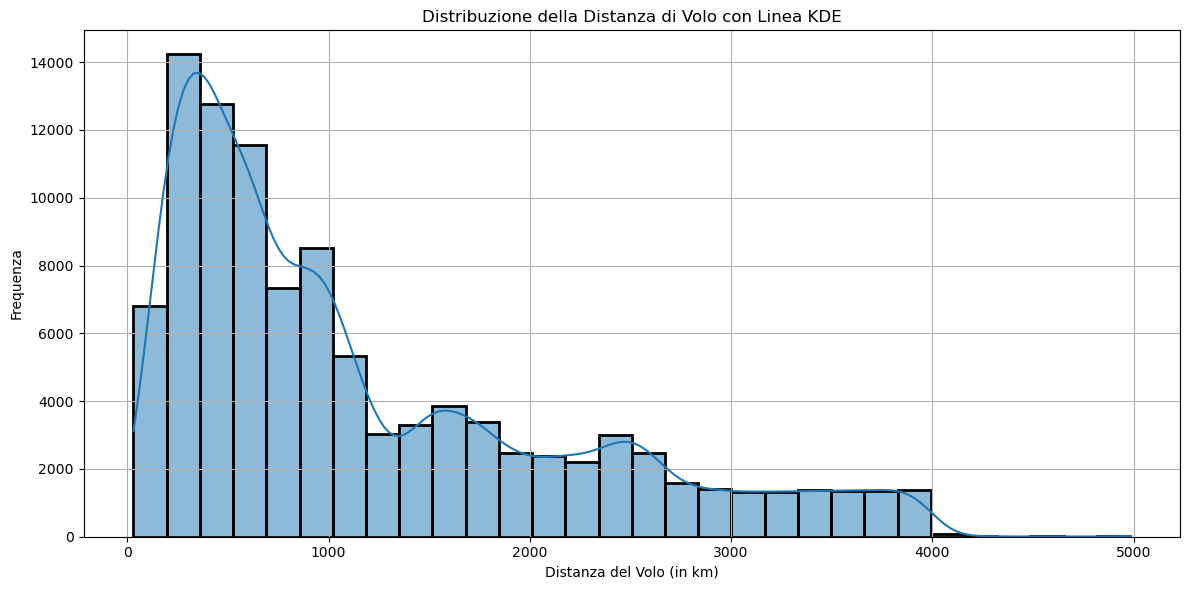

In [54]:
plt.figure(figsize=(12,6))

sns.histplot(df_train['Flight Distance'], kde=True, bins=30, linewidth=2)

plt.title('Distribuzione della Distanza di Volo con Linea KDE')
plt.xlabel('Distanza del Volo (in km)')
plt.ylabel('Frequenza')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Dall'analisi del grafico emerge che la maggior parte dei voli riguarda tratte brevi,
# ma esiste comunque un numero significativo di voli superiori ai 3000 km.

# Abbiamo in precedenza osservato che la percentuale di clienti soddisfatti tende ad aumentare
# con la distanza del volo: i passeggeri dei voli brevi risultano quindi più frequentemente insoddisfatti.

# Questa evidenza suggerisce che è proprio sui voli a corto raggio che la compagnia dovrebbe focalizzare
# maggiormente gli sforzi per migliorare la soddisfazione del cliente.
# Inoltre, molte delle feature risultate più rilevanti nell’analisi 
# (come intrattenimento a bordo, spazio per le gambe, qualità del Wi-Fi, comodità del posto)
# sono tipicamente associate ai voli a lunga percorrenza, dove i servizi offerti sono più numerosi
# e di maggiore qualità. Questo spiega la maggiore correlazione tra queste variabili e la soddisfazione 
# dei passeggeri su tratte più lunghe.

# Per aumentare la soddisfazione complessiva, sarebbe quindi strategico potenziare i servizi anche sui voli brevi,
# colmando il divario esperienziale percepito dai passeggeri.

In [56]:
# Andiamo ora a fare una ulteriore indagine sugli outliers

In [57]:
from sklearn.ensemble import IsolationForest

# Applichiamo Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42,)
yhat = iso.fit_predict(df_train_encoded)

# yhat = 1 per normali, -1 per outliers
df_train_encoded['anomaly'] = yhat

# Calcolo percentuale outliers
outliers = df_train_encoded[df_train_encoded['anomaly'] == -1]
percentuale_outliers = (len(outliers) / len(df_train_encoded)) * 100

print(f"Outlier trovati: {len(outliers)} su {len(df_train_encoded)} righe ({percentuale_outliers:.2f}%)")
df_train_encoded.drop(columns='anomaly', inplace=True)


Outlier trovati: 1040 su 103904 righe (1.00%)


In [63]:
# Nel dataset analizzato, si osservano outlier significativi, 
# in particolare nelle variabili relative ai ritardi dei voli e alla distanza di volo.
# Questi outlier non possono essere semplicemente eliminati o modificati senza rischiare di compromettere
# la rappresentatività del test set e la generalizzazione del modello a scenari reali.

# Pertanto, per i modelli di Machine Learning che sono sensibili alla scala delle variabili e alla presenza di outlier,
# si adotterà una strategia di scalatura. 
# In particolare, si utilizzerà lo StandardScaler che, sebbene non sia immune agli outlier, 
# è generalmente meno influenzato dai valori estremi rispetto al MinMaxScaler in termini di distorsione della scala dei dati "normali". 
# Lo StandardScaler centra i dati sulla media e li scala alla deviazione standard. 
# Gli outlier avranno comunque valori scalati distanti dalla media, ma la scala degli altri punti non sarà compressa
# nell'intervallo [0, 1] come farebbe il MinMaxScaler.

# Tuttavia, è importante notare che la scalatura da sola potrebbe non essere sufficiente per azzerare completamente
# l'impatto degli outlier su modelli particolarmente sensibili. 
# Pertanto, durante la fase di modellazione, si potrebbe anche considerare l'utilizzo di algoritmi che sono
# intrinsecamente più robusti agli outlier (come gli alberi decisionali, le random forest o i modelli basati su gradient boosting)


In [64]:
# Finita l'analisi continuo con la preparazione dei dati per il modello, separo la variabile target dal resto
X_train=df_train_encoded.drop(columns='satisfaction', axis=1)
y_train=df_train_encoded['satisfaction']

X_test=df_test_encoded.drop(columns='satisfaction', axis=1)
y_test=df_test_encoded['satisfaction']

In [65]:
# Preparo dei dataset di training e testing specifici, contenenti le feature identificate come più importanti
# attraverso le tecniche di analisi della rilevanza delle variabili. 

# Questa selezione mirata delle feature ha lo scopo di valutare se un modello addestrato su un set di dati ridotto, 
# focalizzato sulle informazioni più predittive, possa migliorare la performance, 
# ridurre la complessità computazionale e potenzialmente aumentare l'interpretabilità 
# rispetto a un modello che utilizza l'intero set di feature.

In [66]:
X_red_train = X_train[golden_features]
X_red_test = X_test[golden_features]

In [67]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_red_train.shape,X_red_test.shape)

(103904, 23) (25976, 23) (103904,) (25976,) (103904, 6) (25976, 6)


# Scelta della metrica

In [ ]:
# La scelta della metrica dipende dagli obiettivi che si vogliono raggiungere:

# Accuratezza: È una buona metrica quando le classi sono bilanciate e quando falsi positivi e falsi negativi hanno costi simili. 
#     Tuttavia, può essere fuorviante in caso di classi sbilanciate.

# Precisione: È cruciale quando il costo di un falso positivo è alto. 
#     Ad esempio, nello spam filtering, è meglio che un'email legittima non venga classificata come spam (falso positivo),
#     anche a costo di far passare qualche email di spam (falso negativo).

# Recall: È importante quando il costo di un falso negativo è alto. 
#     Ad esempio, nella diagnosi medica di una malattia grave, è fondamentale identificare correttamente tutti
#     i pazienti malati (alto recall), anche se ciò comporta qualche falso positivo 
#     (persone sane classificate come malate che dovranno fare ulteriori accertamenti).

# Specificità: È importante quando è cruciale identificare correttamente le istanze negative. 
#     Ad esempio, in un sistema di rilevamento di frodi, è importante non bloccare transazioni legittime 
#     (alto tasso di veri negativi).

# Punteggio F1: È utile quando si desidera bilanciare precisione e recall, specialmente in presenza di classi sbilanciate. 
#     Fornisce una visione più completa delle prestazioni del modello rispetto alla sola accuratezza.

# AUC-ROC: È una metrica robusta per valutare le prestazioni complessive di un classificatore binario su diverse soglie. 
#     È particolarmente utile quando si è interessati alla capacità del modello di distinguere tra le due classi, 
#     indipendentemente dalla soglia scelta. È meno sensibile agli sbilanciamenti di classe rispetto all'accuratezza.

# Punteggio F-beta: Permette di personalizzare l'importanza relativa di precisione e recall in base 
#     alle esigenze specifiche del problema.

# Log Loss: È la metrica di valutazione principale per i modelli che restituiscono probabilità. 
#     È sensibile alla calibrazione delle probabilità predette e penalizza le previsioni errate con alta confidenza.

# In Sintesi:

#     - Se le classi sono bilanciate e i costi di FP e FN sono simili: Accuratezza.
#     - Se minimizzare i FP è prioritario: Precisione.
#     - Se minimizzare i FN è prioritario: Recall.
#     - Se si vuole un bilanciamento tra Precisione e Recall: F1-Score.
#     - Se si vuole valutare la capacità di distinguere tra le classi indipendentemente dalla soglia: AUC-ROC.
#     - Se si vuole dare più peso a Precisione o Recall: F-beta Score.
#     - Se il modello produce probabilità e si vuole valutare la calibrazione: Log Loss.

# Per questo progetto verrà utilizzata 'accuracy' come metrica di riferimento

# Definizione del modello, training e ottimizzazione degli iperparametri

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score

In [72]:
# Imposto un baseline model per avere poi un confronto con i modelli veri e propri.
# Servirà a farci capire quanto i nostri modelli vanno a migliorare una soluzione semplice e immediata.

# Come baseline scelgo un modello basato su regressione logistica (anzichè un Dummyclassifier) in modo da poter avere un 
# confronto significativo in fase di valutazione finale del modello

# imposto una pipeline che va prima a standardizzare i valori e poi a definire il modello di base
bl_pipeline = Pipeline([('standardize', StandardScaler()), 
                     ('model', LogisticRegression())])

bl_pipeline.fit(X_train,y_train)

y_pr_bl=bl_pipeline.predict(X_test)

accuracy_bl = accuracy_score(y_test, y_pr_bl)
print(f"Accuracy del modello baseline: {accuracy_bl:.2f}")

Accuracy del modello baseline: 0.87


In [73]:
# I modelli che verranno implementati in questo progetto sono tre. 
# Due di essi, Random Forest e AdaBoost, rappresentano approcci di ensemble learning basati su alberi decisionali.

# Per valutare come un paradigma di modellazione differente si comporta su questo problema, 
# verrà incluso un terzo modello: K-Nearest Neighbors (KNN). 

# KNN è un algoritmo basato sulla distanza e sull'apprendimento non parametrico, offrendo una prospettiva 
# completamente diversa rispetto ai modelli basati su alberi.

# Questa scelta strategica permetterà di confrontare le performance di modelli con meccanismi di apprendimento 
# intrinsecamente diversi.

# Inoltre è stato preferito ad altri modelli più complessi (SVM su tutti), per la maggiore velocità computazionale,
# soprattutto su dataset come il nostro di dimensioni medio-grandi

# Per questo particolare modello, sensibile alla scala dei dati, viene prevista una pipeline che va a 
# standardizzare i dati prima di passarli al modello  


# Per la valutazione robusta delle performance dei modelli, verrà adottata una strategia di stratified k-fold cross-validation.
# Questa tecnica è particolarmente indicata in contesti di classificazione, in quanto garantisce che ogni fold
# creato mantenga una proporzione rappresentativa delle diverse classi presenti nella variabile target. 
# In tal modo, si previene il rischio che alcuni fold contengano uno squilibrio di specifiche classi,
# assicurando una stima più affidabile della capacità di generalizzazione dei modelli su dati non visti.

models={
    'Random Forest': RandomForestClassifier(random_state=42),
    'Adaboost':AdaBoostClassifier(random_state=42),
    'K-NN':Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])
}

str_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Verrà avviata una fase di spot checking per ciascun modello selezionato. 
# Questa analisi preliminare, effettuata su una piccola parte del dataset totale, ha lo scopo di fornire 
# una prima indicazione sulle performance relative dei diversi algoritmi sui dati a disposizione. 

# I risultati di questo spot check aiuteranno a identificare quali modelli mostrano un potenziale maggiore 
# e meritano un'esplorazione più approfondita e una successiva ottimizzazione degli iperparametri
def spot_check(X_training,y_training):
    X_tr,_,y_tr,_=train_test_split(X_training,y_training,train_size=0.3,random_state=42)
    
    for name,model in models.items():
        scores = cross_val_score(model, X_tr, y_tr, cv=str_kf, scoring='accuracy')
        print(f'model: {name}: Mean Accuracy = {scores.mean():.4f}')

In [76]:
spot_check(X_train,y_train)

model: Random Forest: Mean Accuracy = 0.9577
model: Adaboost: Mean Accuracy = 0.9087
model: K-NN: Mean Accuracy = 0.9195


In [77]:
spot_check(X_red_train,y_train)

model: Random Forest: Mean Accuracy = 0.9025
model: Adaboost: Mean Accuracy = 0.8946
model: K-NN: Mean Accuracy = 0.9113


In [78]:
# Dai risultati dello spot checking, condotto sia sul dataset completo di feature che su quello ridotto 
# contenente solo le variabili più importanti, i modelli che hanno mostrato le performance preliminari più promettenti
# sono risultati essere:

# Random Forest: Una tecnica di apprendimento ensemble di tipo Bagging.
# K-Nearest Neighbors (KNN): Un algoritmo basato sulla distanza tra istanze.

In [79]:
# Successivamente, per affinare le prestazioni dei modelli promettenti,
# verrà definito uno spazio di ricerca di iperparametri. 

# Su questo spazio, verrà implementata una strategia di Random Search. 
# L'obiettivo di questa fase è esplorare diverse combinazioni di parametri all'interno dei range definiti, 
# al fine di individuare la configurazione che produce le migliori metriche di valutazione sul set di validazione, 
# ottimizzando così le capacità predittive dei modelli.

In [80]:
param_dist_rf = {
    'n_estimators': np.arange(100, 501, 50),               # 100, 150, ..., 500
    'max_depth': np.arange(5, 51, 5),                      # 5, 10, ..., 50
    'min_samples_split': np.arange(2, 11),                 # 2 → 10
    'min_samples_leaf': np.arange(1, 6),                   # 1 → 5
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

param_dist_knn={
    'knn__n_neighbors': list(range(3, 20)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1=Manhattan, 2=Euclidea
}

random_forest=RandomForestClassifier(random_state=42)
knn= Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])


In [81]:
from sklearn.model_selection import RandomizedSearchCV

def random_search_cv(model, param_dist, X_train, y_train, n_iter=20, cv=5, scoring='accuracy', random_state=42):
   
    print(f"\n💥 Inizio RandomizedSearchCV per {model}...\n")

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        random_state=random_state,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)

    print(f"\n✅ Miglior Accuracy: {search.best_score_:.4f}")
    print(f"✅ Migliori Parametri trovati:\n{search.best_params_}\n")

    return search.best_estimator_, search.best_params_

In [82]:
# Successivamente, verrà eseguita la fase di fitting (addestramento) per ogni combinazione di modello e dataset in esame 

In [83]:
rf_full_best_model, rf_full_best_params= random_search_cv(random_forest, param_dist_rf, X_train, y_train)


💥 Inizio RandomizedSearchCV per RandomForestClassifier(random_state=42)...

Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Miglior Accuracy: 0.9632
✅ Migliori Parametri trovati:
{'n_estimators': np.int64(200), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(4), 'max_features': None, 'max_depth': np.int64(20), 'criterion': 'entropy', 'bootstrap': True}



In [ ]:
knn_full_best_model, knn_full_best_params = random_search_cv(knn, param_dist_knn, X_train, y_train)


💥 Inizio RandomizedSearchCV per Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])...

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rf_red_best_model, rf_red_best_params = random_search_cv(random_forest, param_dist_rf, X_red_train, y_train)

In [ ]:
knn_red_best_model, knn_red_best_params = random_search_cv(knn, param_dist_knn, X_red_train, y_train)

In [ ]:
# Per ciascuna di queste combinazioni, i risultati della precedente Random Search hanno permesso di identificare
# i valori degli iperparametri che hanno prodotto le migliori performance all'interno dei range prestabiliti.

# Ora, al fine di esplorare ulteriormente lo spazio degli iperparametri e verificare se sia possibile ottenere
# miglioramenti incrementali nelle prestazioni, verrà inizializzata una nuova iterazione di Random Search. 
# Questa seconda ricerca si concentrerà sugli intorni dei valori di iperparametri ottimali precedentemente identificati, 
# restringendo lo spazio di ricerca per una messa a punto più precisa.

In [ ]:
knn_params_ranges={
    'knn__n_neighbors': np.random.randint(int(knn_full_best_params['knn__n_neighbors']*0.7),int(knn_full_best_params['knn__n_neighbors']*1.3),5),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

In [ ]:
def param_ranges(best_model, seed=42):
    np.random.seed(seed)
    best_params = best_model.get_params()
    param_range = {}

    for param, value in best_params.items():    
        if param == 'n_estimators':
            value = max(10, value)
            param_range[param] = np.random.randint(int(value*0.8), int(value*1.2)+1, 10)

        elif param == 'max_depth':
            if value is None:
                param_range[param] = [3, 4, 5, 6, None]
            else:
                value = max(1, value)
                param_range[param] = np.random.randint(max(1, int(value*0.8)), int(value*1.2)+1, 10)

        elif param in ['min_samples_split', 'min_samples_leaf']:
            value = max(2, value)
            param_range[param] = np.random.randint(2, max(3, int(value*1.5)) + 1, 5)

        elif param == 'max_features':
            param_range[param] = ['sqrt', 'log2', None]

        elif param in ['knn__n_neighbors']:
            param_range[param] = np.random.randint(int(value/1.5),int(value*1.5),10)

        elif param in ['knn__weights']:
            param_range[param] = ['uniform', 'distance']

        elif param in ['knn__p']:
            param_range[param] = [1, 2]
            
        else:
            continue 

    return param_range


In [ ]:
rf_full_param_ranges=param_ranges(rf_full_best_model)
rf_red_param_ranges=param_ranges(rf_red_best_model)

knn_full_param_ranges=param_ranges(knn_full_best_model)
knn_red_param_ranges=param_ranges(knn_red_best_model)


In [ ]:
# Successivamente, verrà eseguita la fase di fitting (addestramento) per ogni combinazione di modello e dataset in esame, 
# con i nuovi range dei parametri appena definiti.

In [ ]:
random_search_results = []
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

top_models=[] # inizializzo la lista che conterrà tutti i modelli migliori

def run_random_search(model_name, dataset_name, model, param_dist, X, y, n_iter=20, skf=5):

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=skf,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X, y)

    best_score = search.best_score_
    best_params = search.best_params_

    print(f"✅ Modello: {model_name} | Dataset: {dataset_name} | Parametri migliori: {best_params} | Accuracy: {best_score:.4f}")
    result = {
        'modello': model_name,
        'dataset': dataset_name,
        'accuracy': best_score,
        'best_params': best_params,
    }

    random_search_results.append(result)
    return search.best_estimator_

In [ ]:
rf_red_top=run_random_search('Random Forest','ridotto',random_forest,rf_red_param_ranges,X_red_train,y_train)
top_models.append(rf_red_top)

In [ ]:
knn_red_top=run_random_search('KNN','ridotto',knn,knn_red_param_ranges,X_red_train,y_train)
top_models.append(knn_red_top)

In [ ]:
rf_full_top=run_random_search('Random Forest','intero',random_forest,rf_full_param_ranges,X_train,y_train)
top_models.append(rf_full_top)

In [ ]:
knn_full_top=run_random_search('KNN','intero',knn,knn_full_param_ranges,X_train,y_train)
top_models.append(knn_full_top)

In [ ]:
# Costruisco un dataframe dei risultati
random_search_results_df=pd.DataFrame(random_search_results).sort_values(by='accuracy',ascending=False).reset_index(drop=True)

In [ ]:
random_search_results_df

# Validazione sul test set

In [ ]:
# Ora testo i modelli su dati mai visti, ovvero sul test_set, mai utilizzato finora

In [ ]:
test_results=[] # inizializzo il contenitore dei risultati di test

In [ ]:
rf_full_top.fit(X_train,y_train)
y_pr_rf_full=rf_full_top.predict(X_test)

accuracy_rf_full=accuracy_score(y_test,y_pr_rf_full)
print(f'Accuratezza del modello RF su dataset intero: {accuracy_rf_full:.4f}')

test_results.append({
    "Modello": "Random Forest",
    "Dataset": "intero",
    "Accuracy": accuracy_rf_full
})


In [ ]:
knn_full_top.fit(X_train,y_train)
y_pr_knn_full=knn_full_top.predict(X_test)

accuracy_knn_full=accuracy_score(y_test,y_pr_knn_full)
print(f'Accuratezza del modello KNN su dataset intero: {accuracy_knn_full:.4f}')

test_results.append({
    "Modello": "K-Nearest Neighbors",
    "Dataset": "intero",
    "Accuracy": accuracy_knn_full
})

In [ ]:
rf_red_top.fit(X_red_train,y_train)
y_pr_rf_red=rf_red_top.predict(X_red_test)

accuracy_rf_red=accuracy_score(y_test,y_pr_rf_red)
print(f'Accuratezza del modello RF su dataset ridotto: {accuracy_rf_red:.4f}')

test_results.append({
    "Modello": "Random Forest",
    "Dataset": "ridotto",
    "Accuracy": accuracy_rf_red
})

In [ ]:
knn_red_top.fit(X_red_train,y_train)
y_pr_knn_red=knn_red_top.predict(X_red_test)

accuracy_knn_red=accuracy_score(y_test,y_pr_knn_red)
print(f'Accuratezza del modello knn su dataset ridotto: {accuracy_knn_red:.4f}')

test_results.append({
    "Modello": "K-Nearest Neighbors",
    "Dataset": "ridotto",
    "Accuracy": accuracy_knn_red
})

In [ ]:
# Faccio un dataframe dei risultati sul test set
df_test_results = pd.DataFrame(test_results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)


# Valutazione finale

In [ ]:
df_test_results


Dai risultati sul test set, con una accuratezza del 96%,
il vincitore risulta il modello Random Forest su dataset intero (ovvero con tutte le features).
Questi ci dicono quanto è probabile che il modello si comporti bene nel "mondo reale" con nuovi clienti e nuove situazioni di volo.

La riduzione delle feature ha comportato una leggera perdita di accuratezza, a indicare che alcune delle variabili escluse apportavano valore predittivo, seppur marginale.  
Tuttavia, il dataset ridotto consente una maggiore interpretabilità del modello, rendendo più semplice tradurre le evidenze in decisioni aziendali.

Tutti le combinazioni modello-dataset ci hanno comunque portato ad un miglioramento dell'accuratezza rispetto al baseline model, il che ci fa dire che gli algoritmi funzionano bene.


# Conclusioni dell’Analisi
L'analisi delle feature più rilevanti nella predizione della soddisfazione dei passeggeri ha evidenziato alcuni fattori chiave che influenzano in modo significativo il giudizio degli utenti.  
Utilizzando diverse tecniche di valutazione dell'importanza delle variabili (feature importance da modelli ad albero, selezione statistica, etc.), è emerso che:

I fattori più determinanti per la soddisfazione sono:
Servizi a bordo e digitali, come:

- Servizio Wi-Fi
- Intrattenimento in volo
- Comodità del posto e spazio per le gambe
- Facilità di prenotazione online
- Check-in online
- Tipo di viaggio (business o personale) e classe del biglietto (Economy, Eco Plus, Business)
- Distanza del volo

Osservazioni chiave:
All’aumentare della distanza del volo, cresce la soddisfazione: ciò potrebbe essere dovuto al fatto che nei voli a lunga percorrenza i passeggeri ricevono più attenzioni e servizi (es. pasti migliori, intrattenimento, maggiore spazio).

Le classi di viaggio superiori (Eco Plus, Business) sono associate a un livello di soddisfazione più elevato, grazie a servizi migliori o più numerosi rispetto all’economy.

In generale, la qualità e la quantità dei servizi offerti risulta il punto di maggiore leva per migliorare l’esperienza del cliente.


Per aumentare la soddisfazione dei clienti, la compagnia dovrebbe investire strategicamente in:

- Miglioramento dei servizi digitali (Wi-Fi, intrattenimento, semplicità di prenotazione e check-in)

- Comfort fisico, anche nei voli brevi: spazio per le gambe, sedili più comodi

- Innalzamento della qualità dei servizi anche per le classi Economy ed Eco Plus, dove c’è maggiore margine di miglioramento

Collegamento con la sostenibilità ambientale:
Pur non essendo direttamente misurata nei dati analizzati, la sostenibilità ambientale può essere integrata nel contesto strategico dell’analisi.

Ad esempio:

- Promuovere l’uso del digitale per check-in e intrattenimento riduce l’uso di carta e materiali fisici.
- Migliorare il comfort senza introdurre materiali pesanti o ingombranti può mantenere l’efficienza dei consumi.
- Targeting più efficiente – Grazie ai modelli, la compagnia può identificare i segmenti dove un piccolo miglioramento porta grande soddisfazione.  
Ciò permette di allocare le risorse in modo più sostenibile, evitando sprechi.
- Educazione e trasparenza – Offrire servizi personalizzati e comunicare l’impegno green della compagnia può aumentare la soddisfazione del cliente sensibile alla sostenibilità, senza modificare l’esperienza in modo invasivo.

Conclusione generale:
L’obiettivo di migliorare la customer satisfaction può andare di pari passo con l’obiettivo ambientale, purché l’innovazione dei servizi sia progettata con attenzione all’efficienza. L’uso dei dati consente un approccio mirato, che evita sprechi e valorizza gli interventi ad alto impatto percepito, anche in ottica ecologica.